In [358]:
import matplotlib;
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

# Part 1

#### 1. Create an array with 100 elements from 1 to 100 in order: Create a box plot to visualize your data.

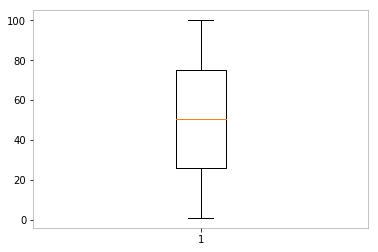

In [302]:
# fake up some data

nums = np.arange(1,101)
plt.boxplot(nums)

plt.show()


#### 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.

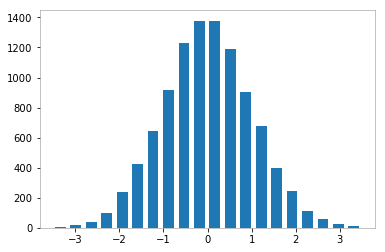

In [303]:
x =  np.random.randn(10000)
hist, bins = np.histogram(x, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=width)
plt.show()

#### 3. Write a program to generate 100 random number uniformly distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.

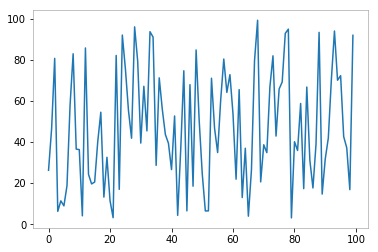

In [304]:
array = np.random.uniform(low=1,high=100,size=100)
array.tofile('uniformDistNums.bin')

plt.plot(array)
plt.show()

#### 4 Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: display a histogram of your result.

In [305]:
def histo(x, bins = 'auto'):
    hist, bins = np.histogram(x, bins=bins)
    width = 0.9*(bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    plt.bar(center, hist, width=width)
    plt.show()

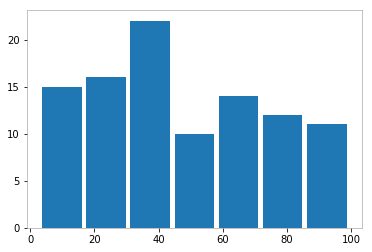

In [306]:
readarray = np.fromfile('uniformDistNums.bin')

histo(readarray, 7)
# hist, bins = np.histogram(x, bins=7)
# width = 0.9*(bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2

# plt.bar(center, hist, width=width)
# plt.show()

# Part 2

## Problem 1
#### Download the NOAA Land Ocean Temperature Anomalies Data Set: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/1/6/1880-2017.csv. Create a histogram of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data.

In [307]:
import pandas as pd


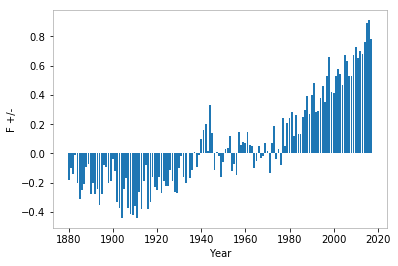

In [385]:
data = pd.read_csv('data/noaa-data.csv')

# data['Value'].hist()#

plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('F +/-')

plt.show()
# data['year'].hist(bins=50)

# data.astype(float)
# data.plot(type='bar')
#data['year']
# data.describe()


## TODO: Describe trend

## Problem 1

#### Download the NOAA Land Ocean Temperature Anomalies Data Set: https://www.ncdc.noaa.gov/cag/time series/global/globe/land_ocean/1/6/1880-2017.csv. Create a histogram of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data

## Problem 2

#### Download the member of Congress by Age data set: https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congressterms.csv. Create a Star Plot of the data and create a Parallel Coordinates Plot of the data. Describe the trends in the data.

Code for star plot obtained from:
[https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot)

In [ ]:
data = pd.read_csv('data/congress-terms.csv')

data
#grouped = data.groupby('chamber')
# for name, group in grouped:
#     #print(name)
#     print(group)
 


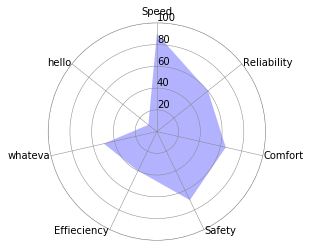

In [311]:
from math import pi

# Set data
cat = ['Speed', 'Reliability', 'Comfort', 'Safety', 'Effieciency', 'whateva', 'hello']
values = [90, 60, 65, 70, 40, 50, 10]

N = len(cat)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")

# Create polar plot
ax = plt.subplot(111, polar=True)

# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Set position of y-labels
ax.set_rlabel_position(0)

# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

# Plot data
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

# Fill area
ax.fill(x_as, values, 'b', alpha=0.3)

# Set axes limits
plt.ylim(0, 100)

# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi
    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()

## Problem 3
Download the U.S. Birth data set:
https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-
2014_SSA.csv. What day of the month had the highest number of births? What day of
the month had the lowest number of births? Are there any interesting trends in the data,
i.e. more births in Summer or Winter? What about births on Friday the 13th?

In [679]:
data = pd.read_csv('data/US_births_2000-2014_SSA.csv')

# d = data[['month', 'births']].groupby(['month']).agg(['sum'])

# d.plot(kind='bar', legend=False)

# dt = data[['day_of_week','date_of_month', 'births']].groupby(['day_of_week','date_of_month']).agg(['sum'])

# result = pd.concat([data['day_of_week'], data['date_of_month']], keys=['day_of_week', 'date_of_month'])
#result

# groups = data.groupby(['day_of_week','date_of_month']).agg('sum')
# dt = data.groupby(['day_of_week','date_of_month'])['births'].count()

# data[['day_of_week', 'date_of_month', 'births']]

data = data[data['day_of_week'] == 5.00]
data = data.groupby(['date_of_month', 'day_of_week'])['births'].agg('sum')
dt = data
# data['Date'] = data[['day_of_week', 'date_of_month', 'year']].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)),axis=1)

# data = data.sort_values(['date_of_month', 'day_of_week'])

# dt = data[data.columns[2:4]].apply(lambda x: '/'.join(x.dropna().astype(int).astype(str)),axis=1)

# dt['Date'] = pd.to_datetime(data['Date'])

# dt = data.groupby(['Date'])['births'].agg('sum')
# data
# dt.plot(kind='bar', legend=False)


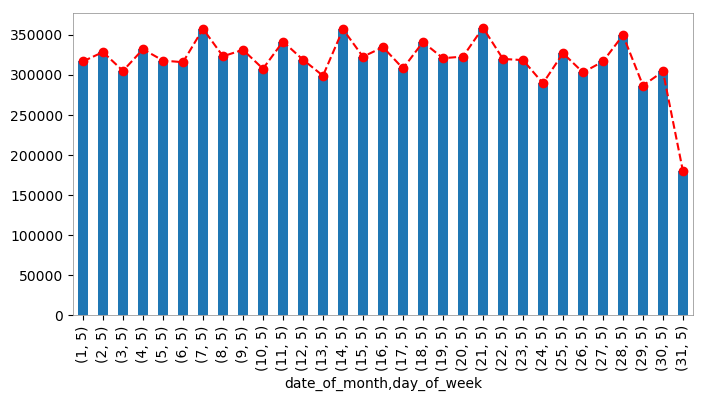

In [714]:
import matplotlib.ticker as plticker

fig = plt.figure(figsize=(8, 4), dpi=100)
xi = [i for i in range(0, 32)]

# .plot()
dt.plot(marker='o', linestyle='--', color='r', label='Square') 
plt.xticks(xi, xi)
dt.plot(kind='bar', legend=False)

plt.show()

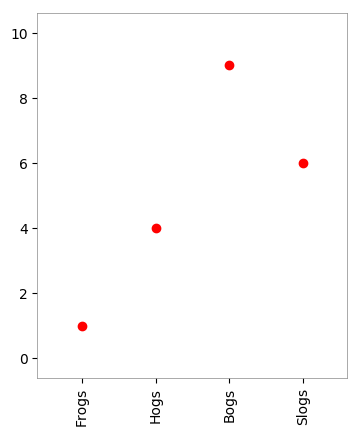

In [703]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()